<a href="https://colab.research.google.com/github/mercy09/ijeoma/blob/main/BAN6440%20MOD%203%20ASSIGNMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# 1. Import Libraries
import nltk
# Download necessary data for tokenization
nltk.download('punkt_tab')
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error
import unittest

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [4]:
# 3. Load Dataset
file_path = '/content/combined_data.csv'
df = pd.read_csv(file_path)
print(df.head())
print(df.info())

   label                                               text
0      1  ounce feather bowl hummingbird opec moment ala...
1      1  wulvob get your medircations online qnb ikud v...
2      0   computer connection from cnn com wednesday es...
3      1  university degree obtain a prosperous future m...
4      0  thanks for all your answers guys i know i shou...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8841 entries, 0 to 8840
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   8841 non-null   int64 
 1   text    8841 non-null   object
dtypes: int64(1), object(1)
memory usage: 138.3+ KB
None


In [5]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [6]:
# Handle missing values (you can modify the strategy)
df.fillna(method='ffill', inplace=True)

<ipython-input-6-31291186d4b1>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [7]:
# Convert all text columns to lowercase (optional)
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.lower()

In [8]:
df.shape

(8841, 2)

In [10]:
X = df['text']
Y = df['label']

In [11]:
print(X)
print(Y)

0       ounce feather bowl hummingbird opec moment ala...
1       wulvob get your medircations online qnb ikud v...
2        computer connection from cnn com wednesday es...
3       university degree obtain a prosperous future m...
4       thanks for all your answers guys i know i shou...
                              ...                        
8836    a liberty university executive says the rev je...
8837    dear opportunities seekers :\ni thought you ju...
8838    author lmuelle date escapenumber escapenumber ...
8839    hellish report is here target sym utevcurrent ...
8840    author larry date fri apr escapenumber escapen...
Name: text, Length: 8841, dtype: object
0       1
1       1
2       0
3       1
4       0
       ..
8836    0
8837    1
8838    0
8839    1
8840    0
Name: label, Length: 8841, dtype: int64


In [12]:
#Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3)

In [13]:
# Print shapes to check the split
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(8841,)
(7072,)
(1769,)


In [14]:
print(Y.shape)
print(Y_train.shape)
print(Y_test.shape)

(8841,)
(7072,)
(1769,)


In [15]:
#Feature Extraction using TF-IDF
feature_extraction = TfidfVectorizer(min_df = 1, stop_words = 'english', lowercase = True)

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

In [16]:
Y_train = pd.to_numeric(Y_train, errors='coerce').fillna(0).astype(int)
Y_test = pd.to_numeric(Y_test, errors='coerce').fillna(0).astype(int)

In [17]:
print(X_train)

3095    while we may have high expectations of our ass...
6284    two costs will be re - signing the pipeline ca...
5302    love - potion for your darling is all you want...
5710    a preacher's wife who claimed her husband abus...
6608    gerald jerry carter wrote alan dekok wrote i t...
                              ...                        
7161    louise ,\ni know you are appropriately focused...
2707    hello ,\nthank you for your m [ ort - gage ] a...
6400    hi aneto aneto okonkwo wrote i have been havin...
1688    dear valued member with this special pharmaceu...
5994    hi all i want to get all the services installe...
Name: text, Length: 7072, dtype: object


In [18]:
print(X_train_features)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 638453 stored elements and shape (7072, 77758)>
  Coords	Values
  (0, 32517)	0.010387484957590435
  (0, 25694)	0.007439848878461966
  (0, 7051)	0.008337188245401288
  (0, 57484)	0.008200218317027566
  (0, 34310)	0.00764441845300011
  (0, 63470)	0.008200218317027566
  (0, 48765)	0.007395524431687266
  (0, 63866)	0.009128875847779239
  (0, 56928)	0.00831683635827002
  (0, 51614)	0.0054983748959511695
  (0, 65384)	0.017521400004365407
  (0, 12404)	0.023689953471782967
  (0, 13140)	0.02477217348017954
  (0, 35661)	0.008816107841317979
  (0, 50852)	0.008873647267032934
  (0, 40614)	0.016192280150721397
  (0, 37620)	0.004088343602443064
  (0, 64622)	0.008655685619719094
  (0, 67020)	0.009094487192373886
  (0, 64290)	0.006814709303002297
  (0, 15285)	0.00809203813310892
  (0, 53665)	0.00810953354458699
  (0, 18878)	0.007896651157260988
  (0, 23567)	0.007406483020107855
  (0, 57793)	0.007439848878461966
  :	:
  (7070, 60510)	0.18225

In [19]:
#Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train_features, Y_train)

LogisticRegression()

In [23]:
#Model Evaluation
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)
print('Acc on training data:', accuracy_on_training_data)

Acc on training data: 0.9878393665158371


In [27]:
prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)
print('Acc on test data:', accuracy_on_test_data)

Acc on test data: 0.9683436970039571


In [25]:
# Make predictions on the test data
Y_pred = model.predict(X_test_features) # This line is added to define Y_pred

# Now calculate and print the evaluation metrics
mse = mean_squared_error(Y_test, Y_pred)
#Import necessary libraries for other metrics
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

In [26]:
print("Mean Squared Error:", mse)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Mean Squared Error: 0.03165630299604296
Precision: 0.9506680369989723
Recall: 0.9914255091103966
F1 Score: 0.9706190975865687


In [29]:
#Unit Testing Class
class TestLogisticRegression(unittest.TestCase):
    def setUp(self):
      self.model = model
      self.sample_spam = ['Congratulation! You have won a lottery of $1,000, 000']
      self.sample_ham = ["Hello, let's meet for coffee tomorrow."]

      def test_spam_prediction(self):
        spam_features = feature_extraction.transform(self.sample_spam)
        prediction = self.model.predict(spam_features)
        self.assertEqual(prediction[0], 1, "Spam prediction is incorrect")

        def test_ham_prediction(self):
          ham_features = feature_extraction.transform(self.sample_ham)
          prediction = self.model.predict(ham_features)
          self.assertEqual(prediction[0], 0, "Ham prediction is incorrect")

if __name__ == '__main__':
    unittest.main(argv=[''], verbosity=2, exit=False)










----------------------------------------------------------------------
Ran 0 tests in 0.000s

OK


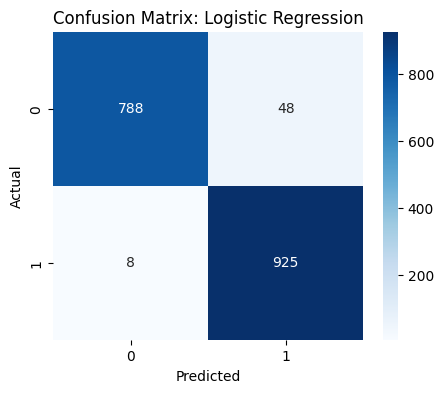

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get predictions from the Logistic Regression model for the test data
Y_pred_log = model.predict(X_test_features) # This line is added to get model predictions

# Confusion Matrix for Logistic Regression
cm_log = confusion_matrix(Y_test, Y_pred_log)
plt.figure(figsize=(5,4))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix: Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()